In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import cv2

In [21]:
import scipy
import scipy.signal

## Question 1

In [2]:
num_students = 4
num_assignments = 5

total_grades = np.arange(0, num_students * num_assignments, 1).reshape(4, 5)
total_grades

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [3]:
# Julie has Student Index 2 so using slicing to get array

Julie = total_grades[2]
Julie

array([10, 11, 12, 13, 14])

In [4]:
# Slicing PSet4 for finding out Assignment Marks

PSet4 = total_grades[:, 4]
PSet4

array([ 4,  9, 14, 19])

## Question 3

In [5]:
import requests

img = requests.get("https://www.dropbox.com/s/8n5v2zp7cuwb0gx/phoenix.jpg?dl=1").content
with open('phoenix.jpg', 'wb') as handler:
    handler.write(img)

In [8]:
phoenix_image = cv2.imread("phoenix.jpg")

# Careful, if it can't find your image, cv2.imread silently fails and returns None!
if phoenix_image is None:
  raise Exception("The image was not found! Check that you can see it on colab's file explorer by clicking the files icon.")

In [10]:
phoenix_image_rgb = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2RGB)

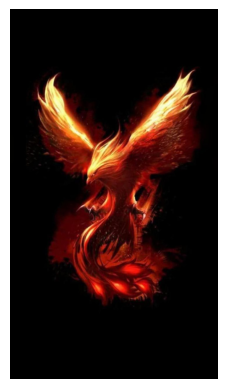

In [12]:
plt.axis('off')
plt.imshow(phoenix_image_rgb)

In [17]:
phoenix_image_gray = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2GRAY)

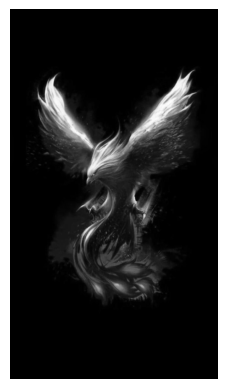

In [19]:
plt.axis('off')
plt.imshow(phoenix_image_gray, cmap = 'gray')

In [22]:
conv2d = scipy.signal.convolve2d

In [23]:
#Kernels 

#Horizontal Edge Detector
horizontal_edge_detector = np.array(
  [
      [-1, 0, 1]
  ]
)

#Box Blur
box_blur_size = 15
box_blur = np.ones((box_blur_size, box_blur_size)) / (box_blur_size ** 2)

#Sharpening Kernel
sharpen_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0,  -1, 0]
    ]
)

#All Edge Detector
all_edge_detector = np.array(
    [
        [0, -1, 0],
        [-1, 4, -1],
        [0,  -1, 0]
    ]
)

In [25]:
# Convolve with different kernels
conv_horizontal_edges = conv2d(phoenix_image_gray, horizontal_edge_detector, mode='same')
conv_box_blur = conv2d(phoenix_image_gray, box_blur, mode='same')
conv_sharpen = conv2d(phoenix_image_gray, sharpen_kernel, mode='same')
conv_all_edges = conv2d(phoenix_image_gray, all_edge_detector, mode='same')

In [26]:
def prep_to_draw(img):
  """ Function which takes in an image and processes it to display it.
  """
  # Scale to 0,255
  prepped = img * 255
  # Clamp to [0, 255]
  prepped = np.clip(prepped, 0, 255) # clips values < 0 to 0 and > 255 to 255.
  prepped = prepped.astype(np.uint8)
  return prepped

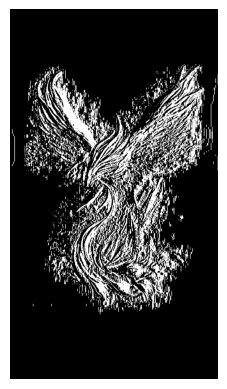

In [27]:
plt.axis('off')
plt.imshow(prep_to_draw(conv_horizontal_edges), cmap = 'gray')

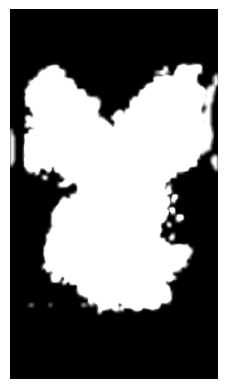

In [28]:
plt.axis('off')
plt.imshow(prep_to_draw(conv_box_blur), cmap = 'gray')

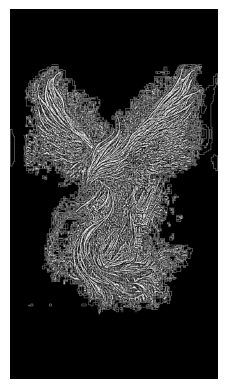

In [29]:
plt.axis('off')
plt.imshow(prep_to_draw(conv_all_edges), cmap = 'gray')

## Exercise 2

In [32]:
num_keypoints = 7
num_joints = 6


# All Z's in one plane, but makes it easier to see XYZ vs Start/end
keypoint_positions = np.array(
    [
        [0, 1, 0], #Head
        [0, 0, 0], #Torso
        [1, 0, 0], #Right Arm
        [-1, 0, 0], #Left Arm
        [0, -1, 0], #Lower ,Torso
        [1, -2, 0], #Right Leg
        [-1, -2, 0] #Left Leg
    ]
)

#   O
#  _|_
#   |
#  /\
joints = np.array([
    # Head to torso
    [0, 1],
    # Torso to Right arm
    [1, 2],
    # Torso to Left Arm
    [2, 3],
    # Torso to Lower Torso
    [3, 4],
    # Lower Torso to Right Leg
    [4, 5],
    # Lower Torso to Left Leg
    [5, 6]
])

In [33]:
#Matrix of joint starts

joint_starts = keypoint_positions[:6]

joint_starts


array([[ 0,  1,  0],
       [ 0,  0,  0],
       [ 1,  0,  0],
       [-1,  0,  0],
       [ 0, -1,  0],
       [ 1, -2,  0]])

In [34]:
#Matrix of joint displacements

joint_disp = keypoint_positions[1:] - keypoint_positions[:6]

joint_disp

array([[ 0, -1,  0],
       [ 1,  0,  0],
       [-2,  0,  0],
       [ 1, -1,  0],
       [ 1, -1,  0],
       [-2,  0,  0]])

In [38]:
#Magnitude of joint displacement

mag = np.sqrt(np.sum(joint_disp**2, axis=1))
mag

array([1.        , 1.        , 2.        , 1.41421356, 1.41421356,
       2.        ])